# Estudo do dataset UNSW-NB15

Neste estudo, vamos analisar o conjunto de dados UNSW-NB15 para detecção de intrusões, seguindo o cenário proposto no artigo intitulado "Statistical analysis of the UNSW-NB15 dataset for intrusion detection" de Kumar, Vikash, Das, Ayan Kumar, e Sinha, Ditipriya.

O artigo foi publicado nos procedimentos da Conferência de Inteligência Computacional em Reconhecimento de Padrões (CIPR) em 2019 pela editora Springer.


## Objetivo

O objetivo deste estudo é realizar uma análise estatística detalhada do conjunto de dados UNSW-NB15 e aplicar técnicas de detecção de intrusões para identificar atividades maliciosas em redes de computadores.

## Abordagem Inicial

Inicialmente, vamos seguir a abordagem proposta no artigo para explorar o conjunto de dados, identificar padrões e realizar análises estatísticas relevantes. Essa análise nos permitirá entender a natureza dos dados e, posteriormente, aplicar algoritmos de detecção de intrusões para classificar eventos de rede como benignos ou maliciosos.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore") 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv


In [2]:
# Load Data
filepath = '/kaggle/input/unsw-nb15/'

train = pd.read_csv(os.path.join(filepath, 'UNSW_NB15_training-set.csv'),index_col = 0)
test = pd.read_csv(os.path.join(filepath, 'UNSW_NB15_testing-set.csv'),index_col = 0)

# Análise Exploratória de Dados (EDA)

Antes de prosseguirmos com a análise do conjunto de dados, é importante realizar uma etapa crucial conhecida como Análise Exploratória de Dados (EDA). Nessa etapa, vamos explorar e compreender a estrutura dos dados disponíveis, identificando as principais características e informações relevantes para o nosso estudo.

## Identificação das Features Numéricas e Categóricas

Vamos começar identificando quais features do conjunto de dados são numéricas e quais são categóricas. As features numéricas são aquelas que representam valores quantitativos, enquanto as categóricas representam categorias ou grupos. Essa distinção é fundamental para selecionarmos as abordagens adequadas para cada tipo de dado.

In [3]:
# Define columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
print("Colunas Numéricas")
print(num_cols)
print("Colunas Categóricas")
print(cat_cols)

Colunas Numéricas
['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']
Colunas Categóricas
['proto', 'service', 'state', 'attack_cat']


## Identificação dos Valores das Features Categóricas

Nesta etapa, vamos explorar as features categóricas do conjunto de dados para identificar os valores únicos presentes em cada uma delas. Essa informação é importante para entendermos a diversidade de categorias e a distribuição dos dados nessas features.


In [4]:
uniques = {}

for column in train.columns:
    uniques[column] = train[column].unique().tolist()
    if column  in cat_cols:
        print(uniques[column])

print(f"train shape :{train.shape}")

['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip', 'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2', 'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6', 'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd', 'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts', 'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn', 'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna', 'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep', 'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip', 'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer', 'ipx-n-ip', 'pgm', 'vrrp', 'l2tp

Aqui podemos observar que existem 10 classes de ataque, sendo uma 'Normal' e as outras 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits', 'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'.  

Um ponto importante que foi identificado foi a quantidade de features presentes nesse conjunto de dados. O artigo no qual estamos comparando esse estudo contabilizou 47 features enquanto na nossa análise, identificamos 43 features. 

As seguintes features estão ausentes:

1. Srcip (Source IP address)
2. Sport (Source port address)
3. Dstip (Destination IP address)
4. Dsport (Destination port address)

Inicialmente não podemos afirmar que a falta dessas features vai prejudicar a análise.

## Encoding de Classes Categóricas

Para facilitar a análise, é comum realizar o encoding de todas as classes categóricas presentes no conjunto de dados. O encoding é um processo que transforma os valores categóricos em valores numéricos, permitindo que algoritmos de machine learning possam trabalhar com esses dados.

No nosso estudo do dataset UNSW-NB15, iremos aplicar o encoding de todas as classes categóricas para garantir que todas as features estejam representadas de forma numérica e prontas para a análise e modelagem.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Lista para armazenar o mapeamento das classes para cada coluna categórica, exceto 'attack'
label_encoder_mappings = {}

for col in cat_cols:
        train[col] = le.fit_transform(train[col])
        test[col] = le.fit_transform(test[col])  # Use transform em vez de fit_transform no conjunto de teste
        
        # Armazenar o mapeamento das classes no dicionário
        label_encoder_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

Nesta etapa, realizamos uma análise exploratória dos conjuntos de dados de treinamento e teste (Train data e Test data). Para isso, utilizamos a função `check_data`, que nos fornece informações importantes sobre os dados, incluindo as primeiras 5 linhas, as estatísticas resumidas (média, desvio padrão, mínimo, máximo, quartis, etc.), a contagem de valores únicos em cada coluna, a presença de valores faltantes (NaN) e valores nulos (Null) em cada coluna.

In [6]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    display(set_frame_style(data[cols].isnull().sum().to_frame().transpose(), f'{title}:Columns With Null'))
    
    
check_data(train, 'Train data')
print('-'*100)
check_data(test, 'Test data')
print('-'*100)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,117,0,4,2,0,496,0,90909.090200,254,0,180363632.000000,0.000000,0,0,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
2,0.000008,117,0,4,2,0,1762,0,125000.000300,254,0,881000000.000000,0.000000,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
3,0.000005,117,0,4,2,0,1068,0,200000.005100,254,0,854400000.000000,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,6,0
4,0.000006,117,0,4,2,0,900,0,166666.660800,254,0,600000000.000000,0.000000,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0
5,0.000010,117,0,4,2,0,2126,0,100000.002500,254,0,850400000.000000,0.000000,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,109.348273,1.421695,3.374751,18.666472,17.545936,7993.908165,13233.785563,82410.886739,180.967667,95.713003,64549016.914059,630546.959000,4.753692,6.308556,755.394301,121.701284,6363.075100,535.180430,133.459080,1084641551.115289,1073464670.880387,128.286620,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1595.371885,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,4.987757,0.550600
std,4.710444,18.637282,2.108083,0.670372,133.916353,115.574086,171642.261880,151471.456091,148620.367041,101.513358,116.667722,179861832.630003,2393000.555646,64.649620,55.708021,6182.615732,1292.378499,56724.016689,3635.305383,127.357000,1390859761.610447,1381996192.032797,127.491370,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,38066.972292,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,1.431541,0.497436
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000008,111.000000,0.000000,3.000000,2.000000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,11202.466797,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,4.000000,0.000000
50%,0.014138,111.000000,0.000000,3.000000,6.000000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,577003.218750,2112.951416,1.000000,0.000000,0.557929,0.010000,17.623918,0.000000,255.000000,27888855.000000,28569748.500000,255.000000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,5.000000,1.000000
75%,0.719360,117.000000,2.000000,4.000000,12.000000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,65142856.000000,15858.082275,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.000000,2171309606.500000,2144205173.000000,255.000000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,6.000000,1.000000
max,59.999989,130.000000,12.000000,6.000000,10646.000000,11018.000000,14355774.000000,14657531.000000,1000000.003000,255.000000,253.000000,5268000256.000000,20821108.000000,5319.000000,5507.000000,60009.992000,57739.240000,1483830.917000,463199.240100,255.000000,4294949667.000000,4294880717.000000,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
Unique Value Count,39888,131,13,7,420,436,4489,4034,40616,11,8,42873,40614,253,311,39970,37617,39944,38381,11,39219,39108,14,26130,24934,24020,1282,1222,8,1190,57,7,50,50,33,57,3,3,8,50,57,2,10,2


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,113,0,2,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,6,0
2,0.649902,113,0,2,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,6,0
3,1.623129,113,0,2,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,6,0
4,1.681642,113,3,2,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,6,0
5,0.449454,113,0,2,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,6,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,109.606675,1.618920,2.355176,20.298664,18.969591,8844.843836,14928.918564,95406.187105,179.546997,79.609567,73454033.194063,671205.574188,4.953000,6.948010,985.976864,88.216296,4976.254226,604.353826,116.257339,969250421.910511,968877027.071153,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2144.291655,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,4.670100,0.680622
std,6.480249,22.352601,2.305151,0.867942,136.887597,110.258271,174765.644309,143654.217718,165400.978457,102.940011,110.506863,188357447.000203,2421312.388757,66.005059,52.732999,7242.245841,987.093195,44965.846519,4061.043281,127.001024,1355264249.263036,1353999546.225652,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,54207.967294,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,1.568238,0.466237
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000008,113.000000,0.000000,2.000000,2.000000,0.000000,114.000000,0.000000,32.786140,62.000000,0.000000,13053.338870,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000
50%,0.001582,113.000000,0.000000,2.000000,2.000000,2.000000,430.000000,164.000000,3225.806520,254.000000,29.000000,879674.750000,1447.022705,0.000000,0.000000,0.279733,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,5.000000,1.000000
75%,0.668069,119.000000,2.000000,3.000000,12.000000,10.000000,1418.000000,1102.000000,125000.000300,254.000000,252.000000,88888888.000000,27844.871090,3.000000,2.000000,55.156896,51.053000,2513.295019,114.990625,255.000000,1916651334.000000,1913674673.000000,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,6.000000,1.000000
max,59.999989,132.000000,12.000000,8.000000,9616.000000,10974.000000,12965233.000000,14655550.000000,1000000.003000,255.000000,254.000000,5988000256.000000,22422730.000000,4803.000000,5484.000000,84371.496000,56716.824000,1460480.016000,289388.269700,255.000000,4294958913.000000,4294881924.000000,255.000000,2.518893,2.100352,1.520884,1504.000000,

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
Unique Value Count,74039,133,13,9,480,443,7214,6660,76991,11,6,80885,77474,409,370,76161,74245,77532,76831,13,75265,75089,7,43319,40142,37708,1357,1328,11,2386,52,5,50,47,32,54,4,4,11,50,52,2,10,2


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


Podemos observar que o conjunto de dados não possui nenhum dado Null ou NaN. Também identificamos a presença de 82332 linhas no conjunto de treinamento e 175341 no conjunto de testes.

# Análise Gráfica

Nesta etapa, vamos realizar algumas análises gráficas para obter uma melhor percepção do comportamento dos dados e da relação entre as features e o target.

Essas análises gráficas nos ajudarão a entender melhor os dados e a tomar decisões mais informadas sobre o pré-processamento e a seleção de features para o desenvolvimento dos modelos de machine learning.

## Análise de Correlação

Nesta etapa, realizamos uma análise de correlação entre as features do conjunto de treinamento e a variável alvo 'attack_cat'. Primeiramente, calculamos a matriz de correlação para as features numéricas utilizando o método `.corr()` do DataFrame. Em seguida, extraímos a correlação entre cada feature e o target, descartando a correlação da variável alvo consigo mesma.

Através da visualização de um heatmap, usando a biblioteca `seaborn`, plotamos as correlações selecionadas com valores absolutos maiores ou iguais a 0.05. Isso nos permite identificar as features com maior impacto na variável alvo. As cores mais quentes (vermelho) indicam maior correlação positiva, enquanto as cores mais frias (azul) indicam maior correlação negativa.

As análises de correlação nos auxiliam a entender melhor a relação entre as variáveis e o target, proporcionando uma base sólida para a seleção e preparação adequada das features que serão utilizadas na construção dos modelos de detecção de intrusões.


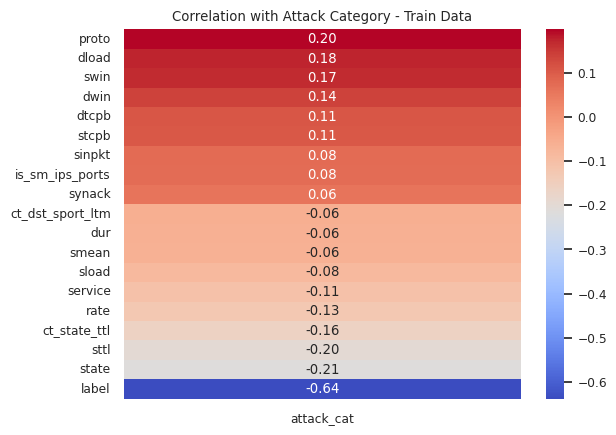

Quantidade: 24
['tcprtt', 'dmean', 'ct_dst_ltm', 'ackdat', 'dinpkt', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'sjit', 'ct_srv_src', 'ct_srv_dst', 'dpkts', 'response_body_len', 'dloss', 'dbytes', 'djit', 'ct_src_dport_ltm', 'ct_src_ltm', 'ct_ftp_cmd', 'spkts', 'is_ftp_login', 'trans_depth', 'sloss', 'dttl', 'sbytes']


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


corr = train.corr(numeric_only=True)
target_corr = corr['attack_cat'].drop('attack_cat')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Selecionar as features com valores de correlação maiores que 0.05 em módulo
target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]

# Criar uma lista com os nomes das features com valores menores que 0.05 em módulo
low_corr_features = target_corr_sorted[abs(target_corr_sorted) < 0.05].index.tolist()


# Plotar o heatmap com as features selecionadas
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Attack Category - Train Data')
plt.show()

# Printar o nome das features com valores menores que 0.1
print(f"Quantidade: {len(low_corr_features)}")
print(low_corr_features)

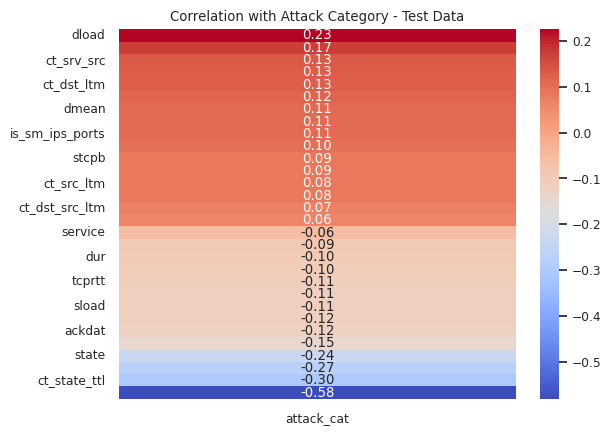

Features com correlação menor a 0.05:
Quantidade: 13
['dpkts', 'dloss', 'dbytes', 'dinpkt', 'response_body_len', 'djit', 'spkts', 'sjit', 'sloss', 'sbytes', 'is_ftp_login', 'ct_ftp_cmd', 'trans_depth']


In [8]:
corr = test.corr(numeric_only=True)
target_corr = corr['attack_cat'].drop('attack_cat')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Selecionar as features com valores de correlação maiores que 0.05 em módulo
target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]

# Criar uma lista com os nomes das features com valores menores que 0.05 em módulo
low_corr_features = target_corr_sorted[abs(target_corr_sorted) < 0.05].index.tolist()


# Plotar o heatmap com as features selecionadas
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Attack Category - Test Data')
plt.show()

# Printar o nome das features com valores menores que 0.1
print("Features com correlação menor a 0.05:")
print(f"Quantidade: {len(low_corr_features)}")
print(low_corr_features)


### Observações sobre a correlação
Podemos observar que o conjunto de treinamento identificou 24 features features com correlação menor a 0.05 e o conjunto de teste identificou 13. 

Como a correlação entre features e o target pode depender da quantidade de dados disponíveis em cada conjunto e temos um conjunto de treinamento menor que o conjunto de testes ele pode apresentar menos informações para identificar correlações, resultando em mais features com valores abaixo de 0.05.

# Análise de ganho de informação

O código apresentado realiza o processo de seleção de features usando a técnica de Information Gain. Essa técnica é comumente utilizada para a seleção de características relevantes em conjuntos de dados. O Information Gain é uma métrica que mede o ganho de informação obtido ao dividir os dados com base em uma determinada feature. Quanto maior o valor do Information Gain para uma feature, mais relevante ela é para a classificação do conjunto de dados em relação ao target (coluna "attack_cat" neste caso).

O processo de seleção de features começa calculando a entropia do conjunto de dados em relação ao target. A entropia mede a impureza dos dados e é usada como referência para medir a relevância das features. A fórmula para calcular a entropia (H) é dada por:

H(D) = - Σ (Pi * log2(Pi))

Onde Pi é a probabilidade de um dado pertencer a uma classe específica (i), e a soma é realizada para todas as classes presentes no conjunto de dados.

Em seguida, é calculada a entropia para cada feature individual, ou seja, a incerteza associada à classificação dos dados quando consideramos cada feature isoladamente. A entropia para a feature A é dada por:

H(A) = Σ (Dj / |D|) * H(Dj)

Onde Dj é o número de tuplas que possuem o valor da feature A igual a um valor específico j, e |D| é o tamanho total do conjunto de dados.

O Information Gain é obtido subtraindo a entropia da feature (H(A)) da entropia geral do conjunto de dados (H(D)). A fórmula para calcular o Information Gain (IG) é:

IG(A) = H(D) - H(A)

As features com os maiores valores de Information Gain são selecionadas para fazerem parte do conjunto reduzido de features, pois são consideradas as mais discriminativas em relação ao target.


In [9]:
# Calcular a entropia do conjunto de dados 'train'
def entropy(data):
    class_column = 'attack_cat'  # Coluna que representa a classe (target)
    counts = data[class_column].value_counts()
    total_samples = len(data)
    entropy_val = -np.sum([(count / total_samples) * np.log2(count / total_samples) for count in counts])
    return entropy_val

# Calcular a entropia para cada feature individual no conjunto de dados 'train'
def feature_entropy(data, feature):
    class_column = 'attack_cat'  # Coluna que representa a classe (target)
    values = data[feature].unique()
    feature_entropy_val = 0
    for value in values:
        subset = data[data[feature] == value]
        subset_size = len(subset)
        subset_entropy = entropy(subset)
        feature_entropy_val += (subset_size / len(data)) * subset_entropy
    return feature_entropy_val

# Calcular o Information Gain para cada feature
def information_gain(data, feature):
    dataset_entropy = entropy(data)
    feature_entropy_val = feature_entropy(data, feature)
    information_gain_val = dataset_entropy - feature_entropy_val
    return information_gain_val

# Selecionar as features com os maiores valores de Information Gain
def select_features_by_information_gain(data, num_features):
    information_gains = {}
    for feature in data.columns:
        if feature != 'attack_cat':  # Não considerar a coluna de classe como feature
            information_gain_val = information_gain(data, feature)
            information_gains[feature] = information_gain_val

    # Ordenar as features pelo valor do Information Gain em ordem decrescente
    sorted_features = sorted(information_gains.items(), key=lambda x: x[1], reverse=True)

    # Selecionar as num_features com os maiores valores de Information Gain
    selected_features = [feature for feature, _ in sorted_features[:num_features]]
    return selected_features


Como no artigo mencionado foram selecionadas 22 features a partir desse processo, vamos fazer o mesmo.

In [10]:
# Reduzir o DataFrame 'train' mantendo apenas as 22 features selecionadas
selected_features = select_features_by_information_gain(train, num_features=22)
train_reduced = train[selected_features]

# Reduzir o DataFrame 'test' mantendo apenas as 22 features selecionadas
test_reduced = test[selected_features]

# Adicionar a coluna target ('attack_cat') de volta aos DataFrames reduzidos
train_reduced['attack_cat'] = train['attack_cat']
test_reduced['attack_cat'] = test['attack_cat']

# Obter a lista de todas as features do DataFrame 'train'
all_features = train.columns.tolist()

# Remover a coluna 'attack_cat' da lista de todas as features
all_features.remove('attack_cat')

# Obter a lista de features não selecionadas
non_selected_features = [feature for feature in all_features if feature not in selected_features]

Após a aplicação do método de Information Gain, selecionamos as 22 features mais relevantes para o conjunto de dados, mantendo-as nos DataFrames 'train_reduced' e 'test_reduced'. As features selecionadas foram armazenadas na variável 'selected_features'.

As features não selecionadas, que não apresentaram alto valor de Information Gain, foram armazenadas na variável 'non_selected_features'. Com isso, podemos comparar essas listas com as features mencionadas no artigo e verificar a concordância com a seleção realizada no estudo. 


## Comparação entre as features selecionadas pela nossa análise e pela análise do artigo mencionado.

In [11]:
non_selected_features_article = ['Srcip', 'Sport', 'Dstip', 'Dstport', 'State', 'Sload', 'Dload', 'Swin', 'Dwin', 'Stcpb',
                            'Dtcpb', 'Trans_depth', 'Res_bdy_len', 'Djit', 'Stime', 'Ltime', 'Sinpkt', 'Tcprtt', 'Synack',
                            'Ackdat', 'Is_sm_ips_parts', 'Ct_ftw_http_mthd', 'Is_ftp_login', 'Ct_ftp_cmd',
                            'Ct_src_ltm']

non_selected_features_article = [feature.lower() for feature in non_selected_features_article]

selected_features_article = ['Ct_dst_ltm', 'Ct_dst_sport_ltm', 'Ct_dst_src_ltm', 'Ct_src_dport_ltm', 'Ct_srv_dst',
                                 'Ct_srv_src', 'Ct_state_ttl', 'Dbytes', 'Dinpkt', 'Dloss', 'Dmeanz', 'Dpkts', 'Dttl',
                                 'Dur', 'Proto', 'Sbytes', 'Service', 'Sjit', 'Sloss', 'Smeanz', 'spkts', 'Sttl']


selected_features_article = [feature.lower() for feature in selected_features_article]


### Comparação das features não selecionadas

In [12]:
# Verificar quais features estão presentes no non_selected_features_article
common_features = set(non_selected_features) & set(non_selected_features_article)
num_common_features = len(common_features)

# Imprimir as features comuns e a quantidade
print("Features comuns:")
print(common_features)
print(f"Quantidade: {num_common_features}")


Features comuns:
{'ct_ftp_cmd', 'state', 'trans_depth', 'swin', 'dwin', 'ct_src_ltm', 'is_ftp_login'}
Quantidade: 7


### Comparação das features selecionadas

In [13]:
# Verificar quais features estão presentes no selected_features_article
common_features = set(selected_features) & set(selected_features_article)
num_common_features = len(common_features)

# Imprimir as features comuns e a quantidade
print("Features comuns:")
print(common_features)
print(f"Quantidade: {num_common_features}")


Features comuns:
{'sbytes', 'dbytes', 'service', 'ct_dst_sport_ltm', 'dinpkt', 'proto', 'sjit', 'dur', 'ct_state_ttl'}
Quantidade: 9


É interessante observar que as features selecionadas a partir da nossa análise diferem das selecionadas no artigo mencionado. Essa discrepância pode ser atribuída a possíveis diferenças de implementação no cálculo do ganho de informação.

Essas discrepâncias podem ser explicadas pelas diferentes abordagens e parâmetros utilizados nos modelos de classificação empregados no artigo, o que ressalta a importância de uma análise cuidadosa e contextualizada das features selecionadas para o problema em questão.

# Análise de Distribuição de Classes

Para visualizar a distribuição das classes da variável target 'attack_cat' nos conjuntos de treinamento e teste, utilizamos gráficos de pizza e gráficos de barras.

O gráfico de pizza mostra a proporção de cada classe em relação ao total de amostras, permitindo uma rápida visualização das distribuições relativas. O gráfico de barras apresenta o número de ocorrências de cada classe na variável target, oferecendo uma perspectiva mais clara da quantidade de amostras em cada classe.



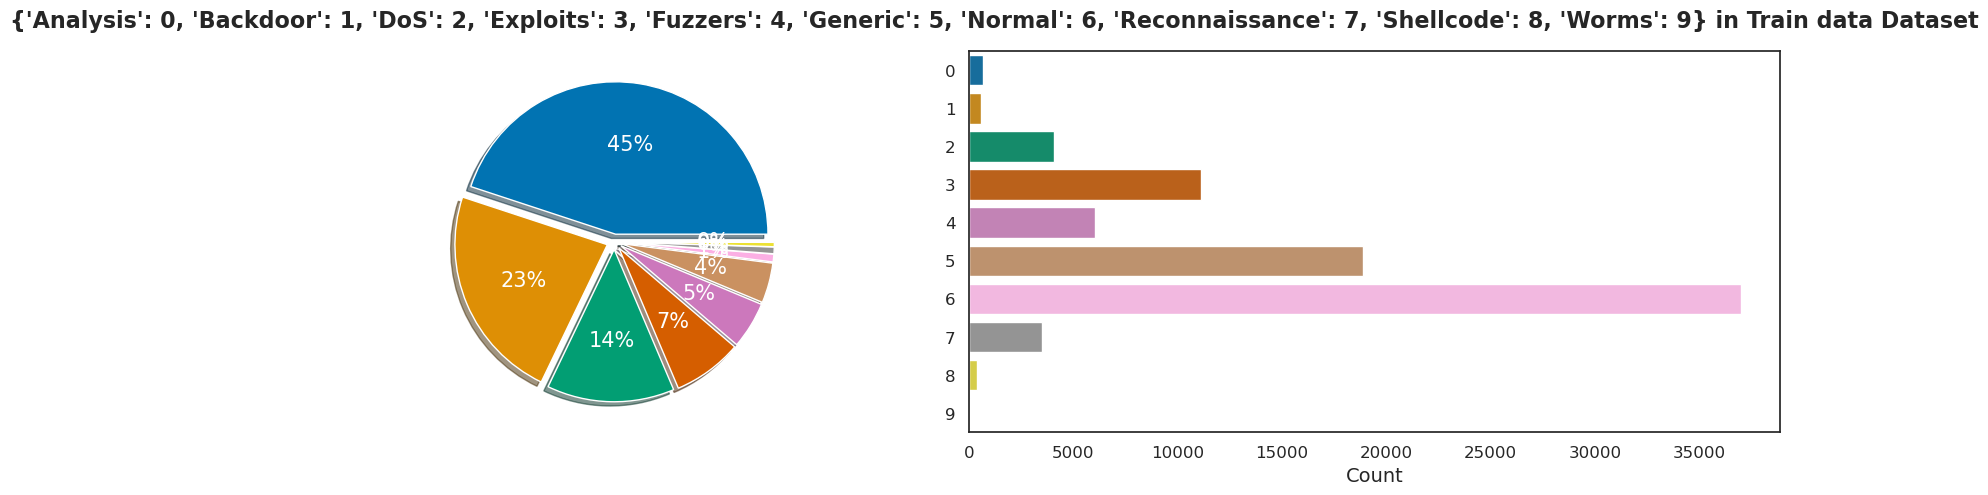

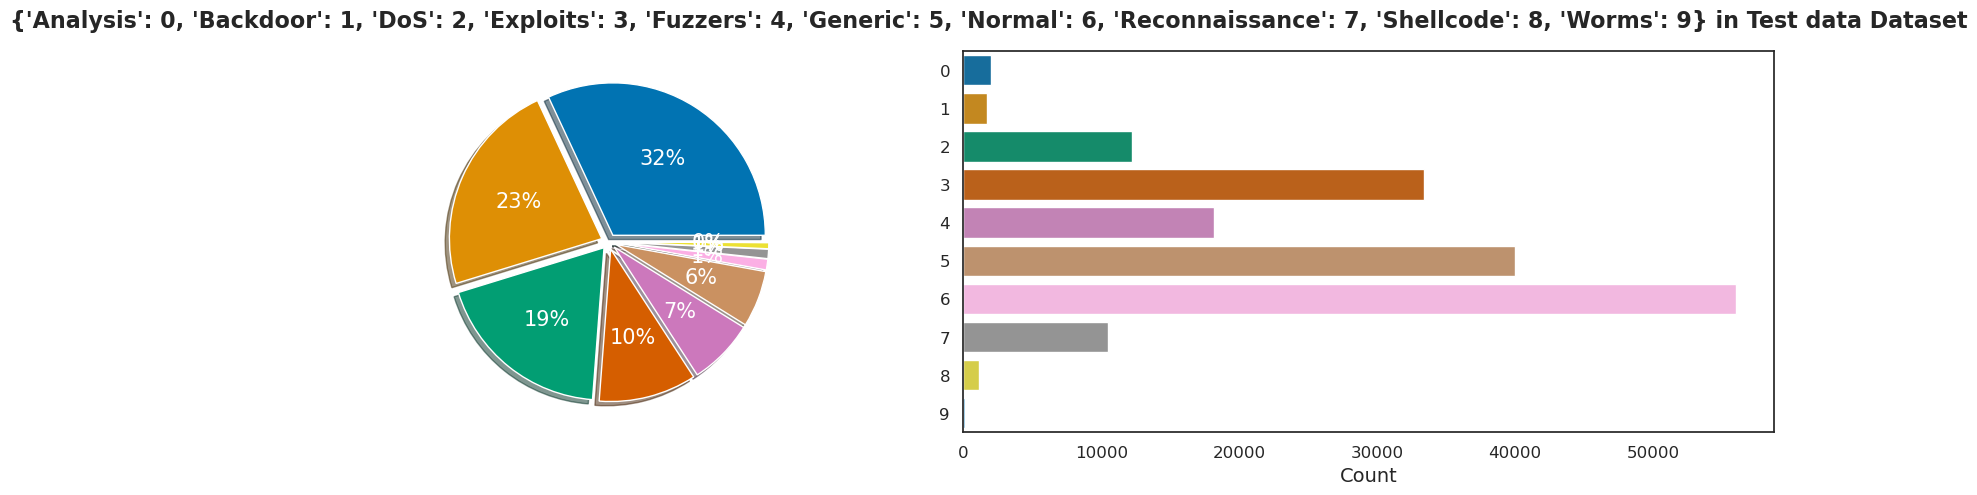

In [14]:
def plot_target_feature(df, target_col, label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train'):
    df = df.fillna('Nan')
    df = df.sort_values(target_col)

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df[target_col].unique()))
    ax[0].pie(
        df[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    target_col_label = label_encoder_mappings[target_col]
    fig.suptitle(f'{target_col_label} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Usando o label_encoder_mappings para criar o gráfico
plot_target_feature(train_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(test_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Test data')


In [15]:
# Contar a quantidade de cada classe no DataFrame 'train_reduced'
train_class_counts = train_reduced['attack_cat'].value_counts()

# Contar a quantidade de cada classe no DataFrame 'test_reduced'
test_class_counts = test_reduced['attack_cat'].value_counts()

# Exibir os resultados
print("Quantidade de cada classe no DataFrame 'train_reduced':")
print(train_class_counts)

print("\nQuantidade de cada classe no DataFrame 'test_reduced':")
print(test_class_counts)


Quantidade de cada classe no DataFrame 'train_reduced':
6    37000
5    18871
3    11132
4     6062
2     4089
7     3496
0      677
1      583
8      378
9       44
Name: attack_cat, dtype: int64

Quantidade de cada classe no DataFrame 'test_reduced':
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: attack_cat, dtype: int64


### Observações sobre a distribuição de classes
No artigo mencionado, foi realizado uma análise com 15 categorias de clusters, revelando que algumas categorias estavam sobrepostas. Portanto, algumas categorias foram removidas por estarem contidas em outras. Após essa remoção, apenas cinco categorias (DoS, Exploit, Generic, Probe e Normal) foram consideradas para a análise.

Relacionando as categorias do artigo com as nossas labels, os dados ficariam da seguinte forma:

1. DoS: 2
2. Exploit: 3
3. Generic: 5
4. Probe: 4
5. Normal: 6

Logo, vamos selecionar essas categorias também.

In [16]:
# Lista com as classes que serão mantidas
selected_classes = [2, 3, 5, 4, 6]

# Filtrar o DataFrame 'train_reduced' mantendo somente as classes selecionadas
train_reduced = train_reduced[train_reduced['attack_cat'].isin(selected_classes)]

# Filtrar o DataFrame 'test_reduced' mantendo somente as classes selecionadas
test_reduced = test_reduced[test_reduced['attack_cat'].isin(selected_classes)]

print(f"train shape :{train_reduced.shape}")

print(f"train shape :{test_reduced.shape}")

train shape :(77154, 23)
train shape :(159841, 23)


In [17]:
# Contar a quantidade de cada classe no DataFrame 'train_reduced'
train_class_counts = train_reduced['attack_cat'].value_counts()

# Contar a quantidade de cada classe no DataFrame 'test_reduced'
test_class_counts = test_reduced['attack_cat'].value_counts()

# Exibir os resultados
print("Quantidade de cada classe no DataFrame 'train_reduced':")
print(train_class_counts)

print("\nQuantidade de cada classe no DataFrame 'test_reduced':")
print(test_class_counts)

Quantidade de cada classe no DataFrame 'train_reduced':
6    37000
5    18871
3    11132
4     6062
2     4089
Name: attack_cat, dtype: int64

Quantidade de cada classe no DataFrame 'test_reduced':
6    56000
5    40000
3    33393
4    18184
2    12264
Name: attack_cat, dtype: int64


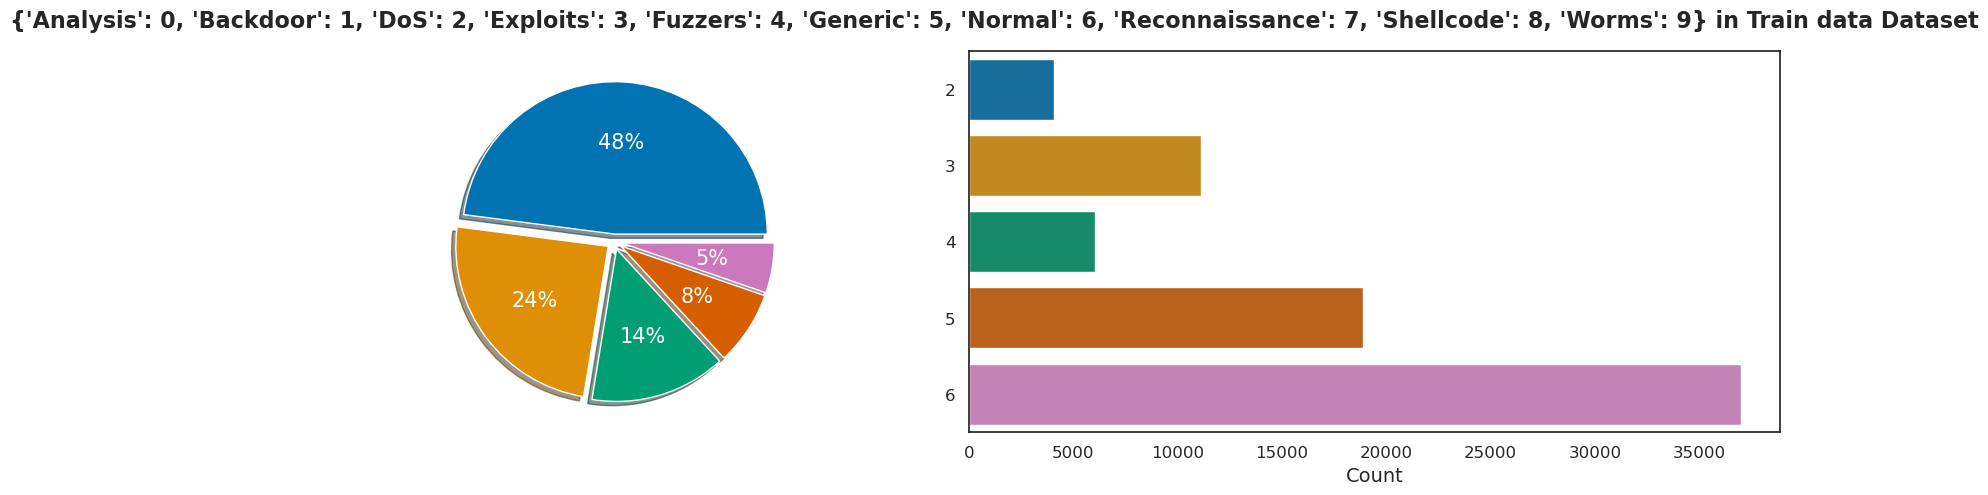

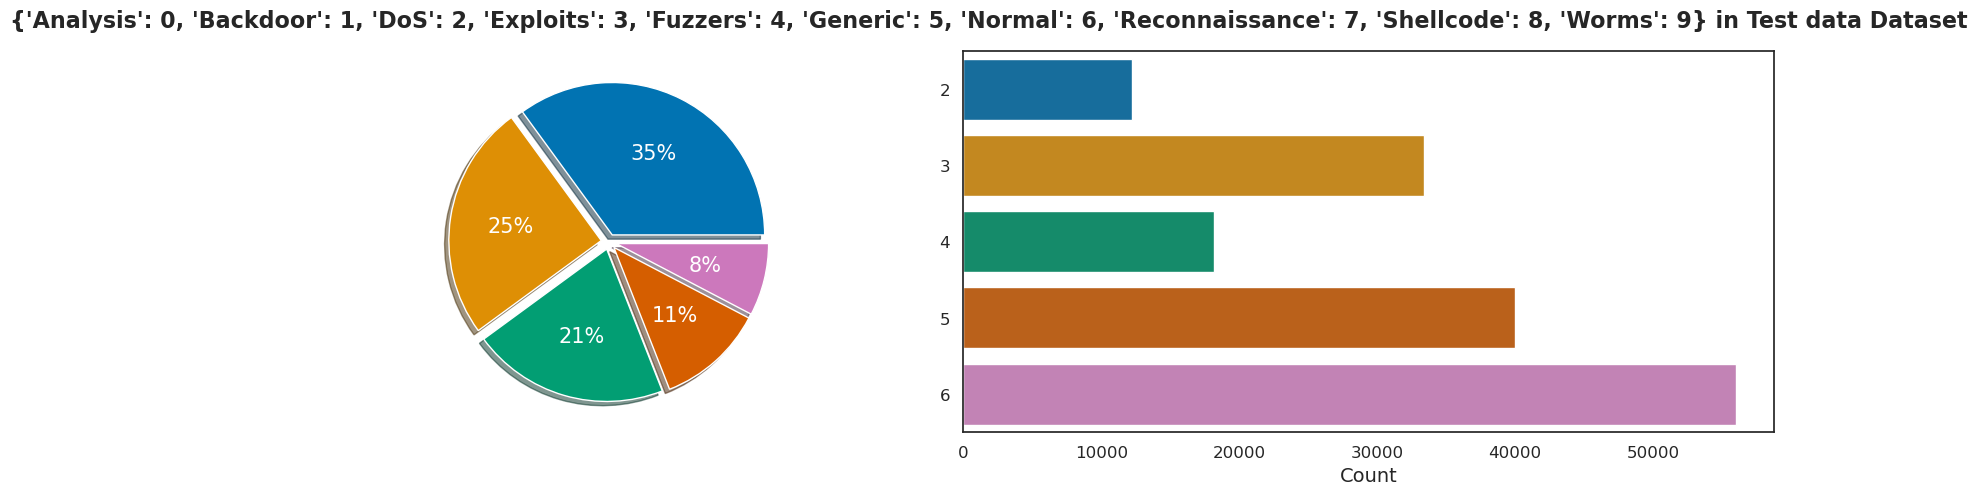

In [18]:
# Usando o label_encoder_mappings para criar o gráfico
plot_target_feature(train_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(test_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Test data')


# Gráfico de dispersão

Utilizamos o método PCA para reduzir a dimensionalidade do DataFrame `train_reduced` e `test_reduced`. Ele cria um gráfico de dispersão para visualizar os dados reduzidos em duas dimensões, colorindo-os de acordo com as classes da coluna 'attack_cat'. O gráfico de dispersão permite visualizar a separação dos dados após a redução de dimensionalidade.

## Dispersão no conjunto de treinamento

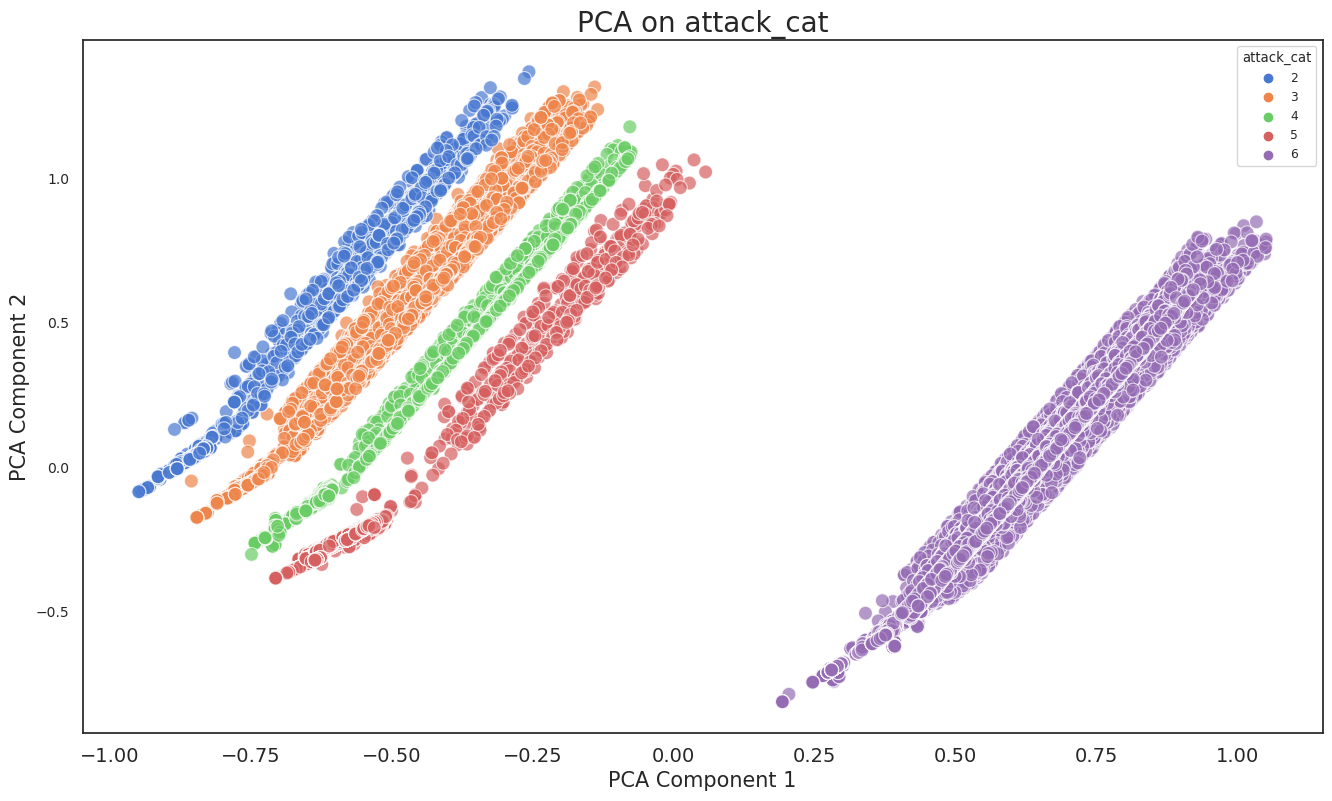

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

class Decomp:
    def __init__(self, n_components, method="pca", scaler_method='standard'):
        self.n_components = n_components
        self.method = method
        self.scaler_method = scaler_method
        
    def dimension_reduction(self, df):
            
        X_reduced = self.dimension_method(df)
        df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def dimension_method(self, df):
        
        X = self.scaler(df)
        if self.method == "pca":
            pca = PCA(n_components=self.n_components, random_state=0)
            X_reduced = pca.fit_transform(X)
            self.comp = pca
        elif self.method == "nmf":
            nmf = NMF(n_components=self.n_components, random_state=0)
            X_reduced = nmf.fit_transform(X)
        elif self.method == "umap":
            comp = UMAP(n_components=self.n_components, random_state=0)
            X_reduced = comp.fit_transform(X)
        elif self.method == "ica":
            comp = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
            X_reduced = comp.fit_transform(X)
        else:
            raise ValueError(f"Invalid method name: {method}")
        
        return X_reduced
    
    def scaler(self, df):
        
        _df = df.copy()
            
        if self.scaler_method == "standard":
            return StandardScaler().fit_transform(_df)
        elif self.scaler_method == "minmax":
            return MinMaxScaler().fit_transform(_df)
        elif self.scaler_method == None:
            return _df.values
        else:
            raise ValueError(f"Invalid scaler_method name")
        
    def get_columns(self):
        return [f'{self.method.upper()}_{_}' for _ in range(self.n_components)]
    
    def get_explained_variance_ratio(self):
        return np.sum(self.comp.explained_variance_ratio_)
    
    def transform(self, df):
        X = self.scaler(df)
        X_reduced = self.comp.transform(X)
        df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        
        return df_comp
    
    def decomp_plot(self, tmp, label, hue='genre'):
        plt.figure(figsize = (16, 9))
        sns.scatterplot(x = f"{label}_0", y = f"{label}_1", data=tmp, hue=hue, alpha=0.7, s=100, palette='muted');

        plt.title(f'{label} on {hue}', fontsize = 20)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 10);
        plt.xlabel(f"{label} Component 1", fontsize = 15)
        plt.ylabel(f"{label} Component 2", fontsize = 15)
    
    
data = train_reduced.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data

## Dispersão no conjunto de teste

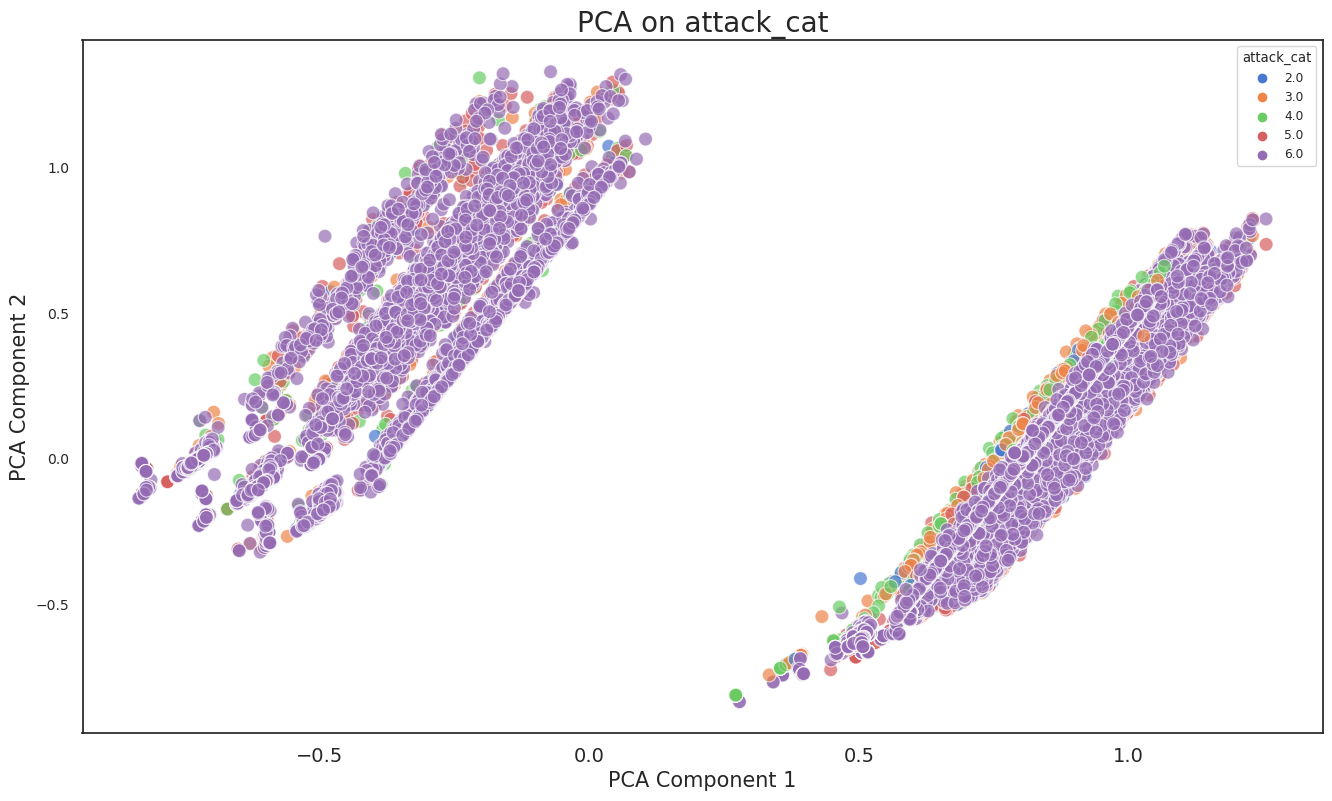

In [20]:
data = test_reduced.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data

### Observação em relação ao gráfico de dispersão

Após analisar o gráfico de dispersão, é possível observar que as classes no conjunto de treinamento estão bem separadas, indicando uma boa separabilidade entre os dados para o algoritmo de classificação. Porém, no conjunto de testes, é perceptível que há uma sobreposição entre as classes, o que pode apresentar desafios para o algoritmo de classificação utilizando técnicas fuzzy.

Para prosseguir com a análise, vamos gerar os datasets "Train" e "Test" ao fim dessa etapa. Esses datasets podem ser utilizados para avaliar o desempenho do algoritmo EIFUZZCND em relação à classificação das classes específicas (DoS, Exploit, Generic, Probe e Normal) e, possivelmente, lidar com a sobreposição de classes.


In [21]:
# Salvando o DataFrame train_reduced em um arquivo CSV
train_reduced.to_csv('train.csv', index=False)

# Salvando o DataFrame test_reduced em um arquivo CSV
test_reduced.to_csv('test.csv', index=False)

In [22]:
# Criação do cabeçalho do arquivo ARFF
header = "@relation UNSW-NB15\n"

# Obter os nomes das colunas e seus tipos
attributes = ""
for column in train_reduced.columns:
    if column == 'attack_cat':
        # Para a coluna de classe, os possíveis valores são 2, 3, 4, 5, 6, que representam as classes
        class_values = ','.join(str(cls) for cls in [2, 3, 4, 5, 6])
        attributes += f"@attribute {column} {{{class_values}}}\n"
    else:
        attributes += f"@attribute {column} real\n"

# Criação da seção de dados
data = "@data\n"
for row in train_reduced.values:
    data += ','.join(str(value) for value in row) + "\n"

# Concatenar tudo para formar o arquivo ARFF completo
arff_data = header + attributes + data

# Salvar o arquivo ARFF em disco
with open('train.arff', 'w') as f_train:
    f_train.write(arff_data)


In [23]:
# Criação do cabeçalho do arquivo ARFF
header = "@relation UNSW-NB15\n"

# Obter os nomes das colunas e seus tipos
attributes = ""
for column in test_reduced.columns:
    if column == 'attack_cat':
        # Para a coluna de classe, os possíveis valores são 2, 3, 4, 5, 6, que representam as classes
        class_values = ','.join(str(cls) for cls in [2, 3, 4, 5, 6])
        attributes += f"@attribute {column} {{{class_values}}}\n"
    else:
        attributes += f"@attribute {column} real\n"

# Criação da seção de dados
data = "@data\n"
for row in test_reduced.values:
    data += ','.join(str(value) for value in row) + "\n"

# Concatenar tudo para formar o arquivo ARFF completo
arff_data = header + attributes + data

# Salvar o arquivo ARFF em disco
with open('test.arff', 'w') as f_test:
    f_test.write(arff_data)
